In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import folium
from folium.plugins import FastMarkerCluster
from folium import plugins 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.gridspec import GridSpec

In [2]:
customers= pd.read_csv('olist_customers_dataset.csv')

In [3]:
geo=pd.read_csv('olist_geolocation_dataset.csv')

In [4]:
itens=pd.read_csv('olist_order_items_dataset.csv')

In [5]:
payment=pd.read_csv('olist_order_payments_dataset.csv')

In [6]:
review=pd.read_csv('olist_order_reviews_dataset.csv')

In [7]:
orders=pd.read_csv('olist_orders_dataset.csv')

In [8]:
products= pd.read_csv('olist_products_dataset.csv')

In [9]:
sellers=pd.read_csv('olist_sellers_dataset.csv')

In [10]:
category=pd.read_csv('product_category_name_translation.csv')

In [11]:
this=pd.read_csv('products_this.csv')

### Customers
Let's take a look at the customer's profiles. Where are they from?

In [12]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers.describe()

customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

<AxesSubplot:>

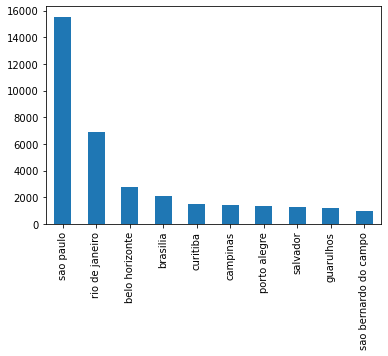

In [15]:
customers['customer_city'].value_counts().head(10).plot(kind='bar')

Top 10 most commom cities. Seems like most os the clients are from São Paulo followed by Rio de Janeiro and Belo Horizonte.

<AxesSubplot:>

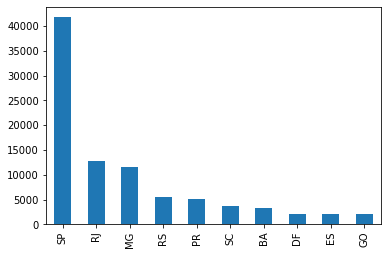

In [16]:
customers['customer_state'].value_counts().head(10).plot(kind='bar')

Top 10 most commom states

In [17]:
customers['customer_unique_id'].nunique()

96096

There are 96096 unique customers on this dataset

In [18]:
geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [19]:
geo['geolocation_city'].value_counts()

sao paulo              135800
rio de janeiro          62151
belo horizonte          27805
são paulo               24918
curitiba                16593
                        ...  
olho d'água                 1
pratânia                    1
são josé do torto           1
chapadão do lageado         1
coronel pilar               1
Name: geolocation_city, Length: 8011, dtype: int64

In [20]:
geo['geolocation_state'].value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

In [21]:
locais= geo[['geolocation_lat', 'geolocation_lng']].values.tolist()

In [22]:
map_= folium.Map(location=[-14.356625, -50.343006], zoom_start=6)

In [23]:
FastMarkerCluster(data=locais).add_to(map_)

In [105]:
#map_

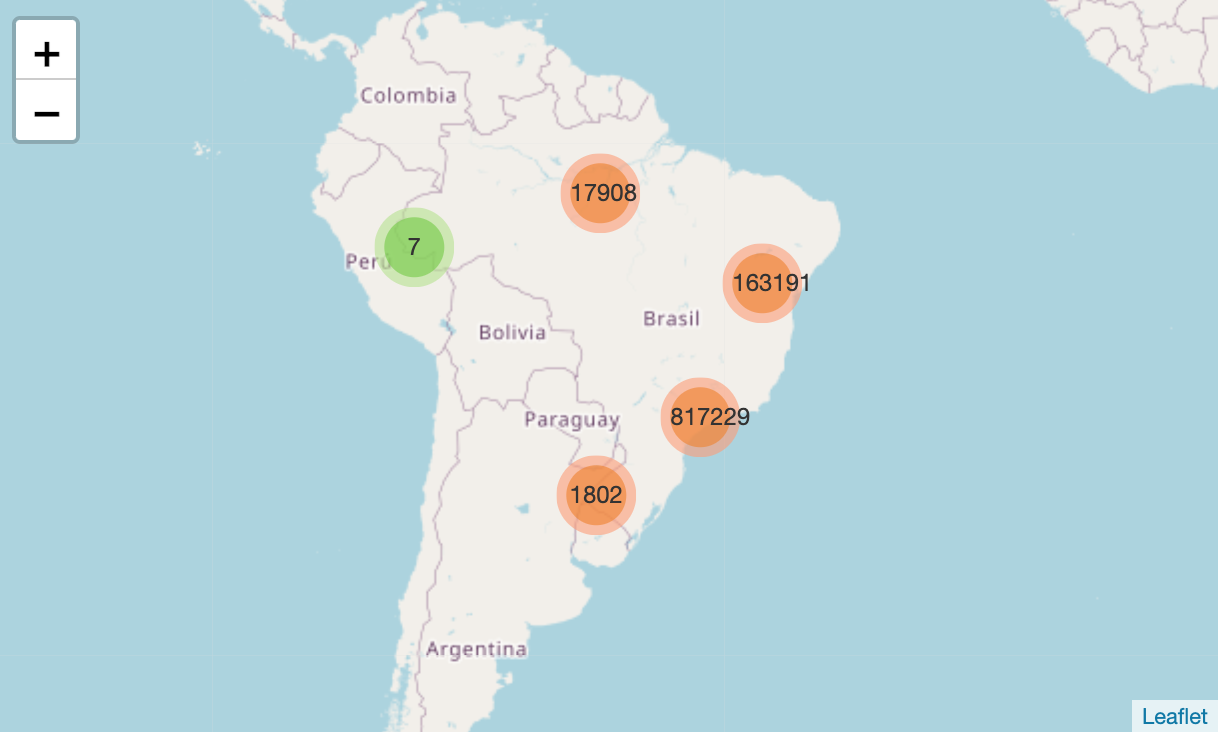

As we can see from the maps, most of the customers are from São Paulo. What I find interesting is the fact that there are other countries aside from Brazil that also have customers. I guess the clustermarker isnt a very accurate way to know the location.  To see an interactive map, uncomment cell above.

In [25]:
map_= folium.Map(location=[-14.356625, -50.343006], zoom_start=6, tiles='Stamen Toner')

In [26]:
locais

[[-23.545621281152677, -46.63929204800168],
 [-23.54608112703553, -46.64482029837157],
 [-23.54612896641469, -46.642951483611384],
 [-23.544392164868103, -46.63949930627844],
 [-23.54157796171149, -46.641607223296134],
 [-23.547762303364266, -46.63536053788447],
 [-23.54627311241268, -46.64122516971552],
 [-23.546923208436727, -46.6342636964915],
 [-23.54376905576913, -46.63427784085132],
 [-23.54763955032063, -46.636031623154956],
 [-23.547325128224372, -46.63418378613893],
 [-23.53841810407414, -46.63477837526674],
 [-23.546435343326202, -46.633830233971956],
 [-23.548945985189434, -46.634671132928716],
 [-23.54518734081604, -46.637855241041066],
 [-23.54608112703553, -46.64482029837157],
 [-23.54188300998332, -46.63991946670314],
 [-23.541389521053933, -46.62989908781218],
 [-23.54693540437998, -46.636587926596974],
 [-23.54588427921401, -46.64316319124004],
 [-23.54516589177093, -46.643785796266464],
 [-23.552235471002323, -46.6284406588955],
 [-23.546690486964888, -46.635446958807

In [104]:
#map_.add_child(plugins.HeatMap(locais,min_opacity=0.1))

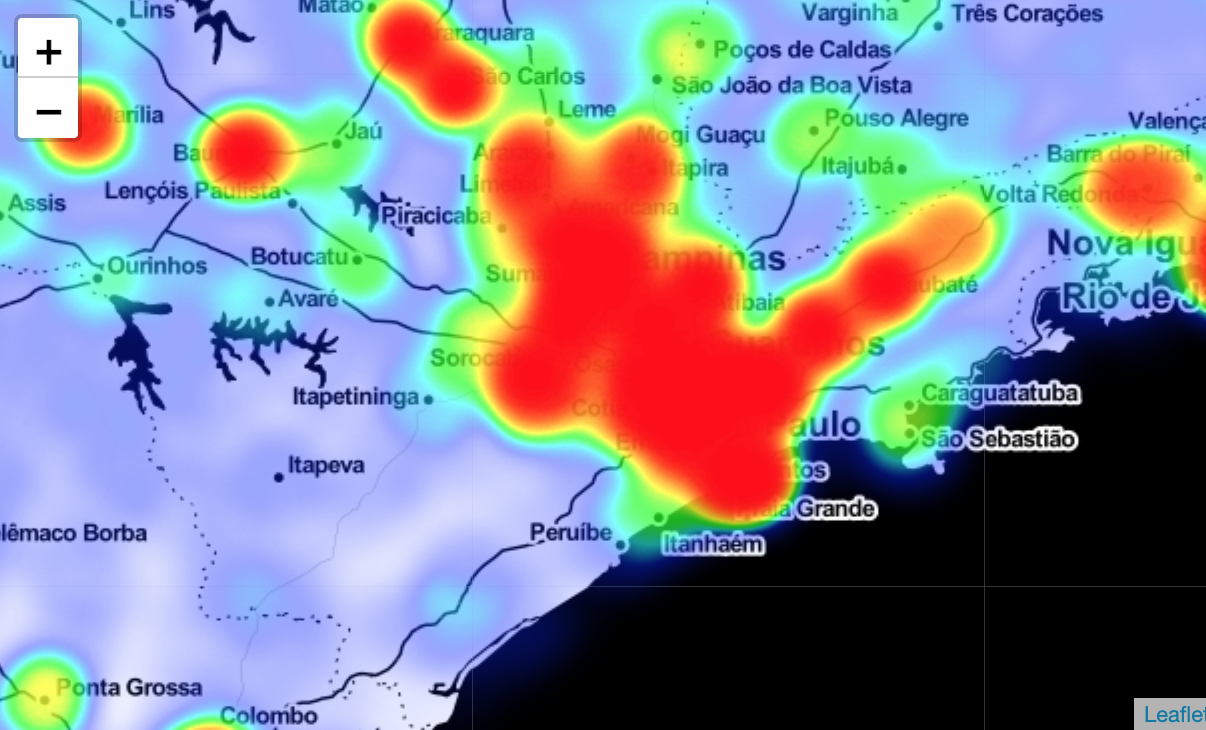

Maybe this heatmap is a little better to visualize where the customers are from. To see an interactive map, uncomment cell above.

### Orders overview
Here let's take a look at orders. We will be joining tables that have order_id in the table as a column. These tables are: payment, reviews, orders. Maybe we can extract some insights about price orders

In [28]:
itens.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [29]:
itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


payment.head()

In [30]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [32]:
review.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [33]:
df= itens.merge(payment, how='left', on='order_id')

In [34]:
df= df.merge(orders, how='left', on='order_id')

In [35]:
df= df.merge(review, how='left', on='order_id')

In [36]:
df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-09-19 09:45:35   58.90          13.29                 1.0   
1  2017-05-03 11:05:13  239.90          19.93                 1.0   
2  2018-01-18 14:48:30  199.00          17.87                 1.0   
3  2018-08-15 10:10:18   12.99          12.79                 1.0   
4  2017-02-13 13:57:51  199.90          18.14                 1.0   

  payment_type  payment_installments  ...    order_approved_at  \
0  credit_card                   2.0  ...  2017-09-13 09:45:35   
1  credit_card                   3.0  ...  2017-04-26 11:05:13   
2  credit_card                   5.0  ...  2018-01-14 14:48:30   
3  credit_card                   2.0  ...  2018-08-08 10:10:18   
4  credit_card                   3.0  ...  2017-02-04 14:10:13   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-09-19 18:34:16           2017-09-20 23:43:48   
1          2017-05-04 14:35:00           2017-05-12 16:04:24   
2          2018-01-16 12:36:48           2018-01-22 13:19:16   
3          2018-08-10 13:28:00           2018-08-14 13:32:39   
4          2017-02-16 09:46:09           2017-03-01 16:42:31   

  order_estimated_delivery_date                         review_id  \
0           2017-09-29 00:00:00  97ca439bc427b48bc1cd7177abe71365   
1           2017-05-15 00:00:00  7b07bacd811c4117b742569b04ce3580   
2           2018-02-05 00:00:00  0c5b33dea94867d1ac402749e5438e8b   
3           2018-08-20 00:00:00  f4028d019cb58564807486a6aaf33817   
4           2017-03-17 00:00:00  940144190dcba6351888cafa43f3a3a5   

  review_score review_comment_title  \
0            5                  NaN   
1            4                  NaN   
2            5                  NaN   
3            4                  NaN   
4            5                  NaN   

                              review_comment_message review_creation_date  \
0     Perfeito, produto entregue antes do combinado.  2017-09-21 00:00:00   
1                                                NaN  2017-05-13 00:00:00   
2  Chegou antes do prazo previsto e o produto sur...  2018-01-23 00:00:00   
3                                                NaN  2018-08-15 00:00:00   
4            Gostei pois veio no prazo determinado .  2017-03-02 00:00:00   

   review_answer_timestamp  
0      2017-09-22 10:57:03  
1      2017-05-15 11:34:13  
2      2018-01-23 16:06:31  
3      2018-08-15 16:39:01  
4      2017-03-03 10:54:59  

[5 rows x 24 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118318 non-null  object 
 1   order_item_id                  118318 non-null  int64  
 2   product_id                     118318 non-null  object 
 3   seller_id                      118318 non-null  object 
 4   shipping_limit_date            118318 non-null  object 
 5   price                          118318 non-null  float64
 6   freight_value                  118318 non-null  float64
 7   payment_sequential             118315 non-null  float64
 8   payment_type                   118315 non-null  object 
 9   payment_installments           118315 non-null  float64
 10  payment_value                  118315 non-null  float64
 11  customer_id                    118318 non-null  object 
 12  order_status                  

In [38]:
df.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             104229
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
dtype: int64

Since I used a left join, there will be some values that are null. I just didn't want to lose any data to begin with

In [39]:
df.describe()

order_item_id          price  freight_value  payment_sequential  \
count  118318.000000  118318.000000  118318.000000       118315.000000   
mean        1.196530     120.649109      20.032587            1.094062   
std         0.699467     184.107686      15.836559            0.728555   
min         1.000000       0.850000       0.000000            1.000000   
25%         1.000000      39.900000      13.080000            1.000000   
50%         1.000000      74.900000      16.280000            1.000000   
75%         1.000000     134.900000      21.180000            1.000000   
max        21.000000    6735.000000     409.680000           29.000000   

       payment_installments  payment_value   review_score  
count         118315.000000  118315.000000  118318.000000  
mean               2.943498     172.575651       4.014478  
std                2.778022     267.104661       1.400250  
min                0.000000       0.000000       1.000000  
25%                1.000000      60.850000       3.000000  
50%                2.000000     108.200000       5.000000  
75%                4.000000     189.260000       5.000000  
max               24.000000   13664.080000       5.000000

Right off the bat we can see some interesting stuff, like the mean price is around 120.64, which I think is quite high. We'll have to take a look later on at what products they mainly sell. Another interesting fact is that most review scores are high at around 4 

<AxesSubplot:>

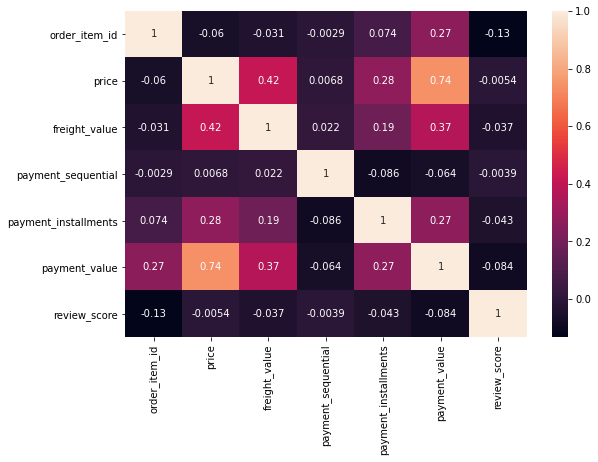

In [40]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True)

There doesn't seem to have much correlation between data. The strongest correlation is between price and payment value.

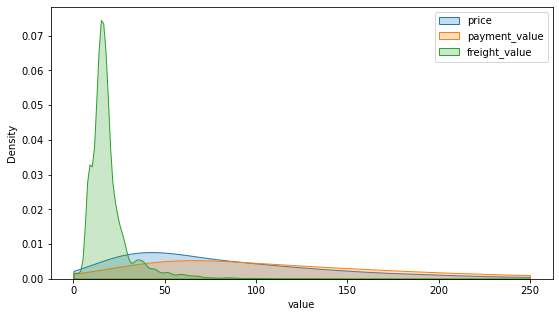

In [41]:
plt.figure(figsize=(9,5))
sns.kdeplot(data=df, x='price',clip=[0, 250], fill=True, label='price')
sns.kdeplot(data=df, x='payment_value',clip=[0, 250], fill=True , label= 'payment_value')
sns.kdeplot(data=df, x='freight_value',clip=[0, 250], fill=True , label= 'freight_value')
plt.xlabel('value')
plt.legend()

In [42]:
(df['freight_value']/df['price']).mean()*100

32.21992521047816

Above we can see the distribution of freight, price and payment values.

In [43]:
df['payment_type'].value_counts()

credit_card    87266
boleto         23018
voucher         6332
debit_card      1699
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

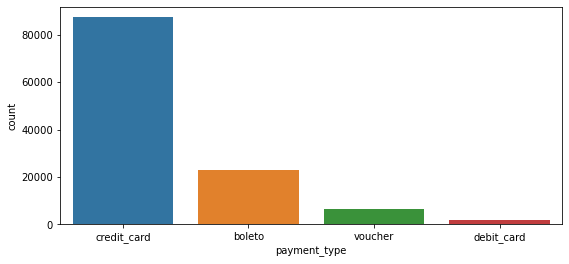

In [44]:
plt.figure(figsize=(9,4))
sns.countplot(data=df, x='payment_type')

In [45]:
pd.set_option('display.max_columns', None)

In [46]:
df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-09-19 09:45:35   58.90          13.29                 1.0   
1  2017-05-03 11:05:13  239.90          19.93                 1.0   
2  2018-01-18 14:48:30  199.00          17.87                 1.0   
3  2018-08-15 10:10:18   12.99          12.79                 1.0   
4  2017-02-13 13:57:51  199.90          18.14                 1.0   

  payment_type  payment_installments  payment_value  \
0  credit_card                   2.0          72.19   
1  credit_card                   3.0         259.83   
2  credit_card                   5.0         216.87   
3  credit_card                   2.0          25.78   
4  credit_card                   3.0         218.04   

                        customer_id order_status order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a    delivered      2017-09-13 08:59:02   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered      2017-04-26 10:53:06   
2  6489ae5e4333f3693df5ad4372dab6d3    delivered      2018-01-14 14:33:31   
3  d4eb9395c8c0431ee92fce09860c5a06    delivered      2018-08-08 10:00:35   
4  58dbd0b2d70206bf40e62cd34e84d795    delivered      2017-02-04 13:57:51   

     order_approved_at order_delivered_carrier_date  \
0  2017-09-13 09:45:35          2017-09-19 18:34:16   
1  2017-04-26 11:05:13          2017-05-04 14:35:00   
2  2018-01-14 14:48:30          2018-01-16 12:36:48   
3  2018-08-08 10:10:18          2018-08-10 13:28:00   
4  2017-02-04 14:10:13          2017-02-16 09:46:09   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-09-20 23:43:48           2017-09-29 00:00:00   
1           2017-05-12 16:04:24           2017-05-15 00:00:00   
2           2018-01-22 13:19:16           2018-02-05 00:00:00   
3           2018-08-14 13:32:39           2018-08-20 00:00:00   
4           2017-03-01 16:42:31           2017-03-17 00:00:00   

                          review_id  review_score review_comment_title  \
0  97ca439bc427b48bc1cd7177abe71365             5                  NaN   
1  7b07bacd811c4117b742569b04ce3580             4                  NaN   
2  0c5b33dea94867d1ac402749e5438e8b             5                  NaN   
3  f4028d019cb58564807486a6aaf33817             4                  NaN   
4  940144190dcba6351888cafa43f3a3a5             5                  NaN   

                              review_comment_message review_creation_date  \
0     Perfeito, produto entregue antes do combinado.  2017-09-21 00:00:00   
1                                                NaN  2017-05-13 00:00:00   
2  Chegou antes do prazo previsto e o produto sur...  2018-01-23 00:00:00   
3                                                NaN  2018-08-15 00:00:00   
4            Gostei pois veio no prazo determinado .  2017-03-02 00:00:00   

  review_answer_timestamp  
0     2017-09-22 10:57:03  
1     2017-05-15 11:34:13  
2     2018-01-23 16:06:31  
3     2018-08-15 16:39:01  
4     2017-03-03 10:54:59

In [47]:
df['order_status'].value_counts()

delivered      115731
shipped          1255
canceled          570
invoiced          376
processing        376
unavailable         7
approved            3
Name: order_status, dtype: int64

In [48]:
df['order_purchase_timestamp_date_only']=df['order_purchase_timestamp'].apply(lambda date: date.split()[0])

In [49]:
df['order_purchase_timestamp_date_only']=pd.to_datetime(df['order_purchase_timestamp_date_only'])

In [50]:
df1=df.groupby('order_purchase_timestamp_date_only').sum()

In [51]:
df1.head()

order_item_id   price  freight_value  \
order_purchase_timestamp_date_only                                         
2016-09-04                                      3   72.89          63.34   
2016-09-05                                      1   59.50          15.56   
2016-09-15                                      6  134.97           8.49   
2016-10-02                                      1  100.00           9.34   
2016-10-03                                      8  463.48         131.66   

                                    payment_sequential  payment_installments  \
order_purchase_timestamp_date_only                                             
2016-09-04                                         2.0                   2.0   
2016-09-05                                         1.0                   3.0   
2016-09-15                                         0.0                   0.0   
2016-10-02                                         1.0                   1.0   
2016-10-03                                         8.0                  19.0   

                                    payment_value  review_score  
order_purchase_timestamp_date_only                               
2016-09-04                                 272.46             2  
2016-09-05                                  75.06             1  
2016-09-15                                   0.00             3  
2016-10-02                                 109.34             1  
2016-10-03                                 595.14            24

In [52]:
def completed_orders(status):
    if status =='delivered':
        return 1
    else:
        return 0

Created a function called completed_orders which it considers an order as complete when the product is delivered to the customer 

In [53]:
df['completed_orders']=df['order_status'].apply(completed_orders)

In [54]:
df2=df.groupby('order_purchase_timestamp_date_only').sum()

<AxesSubplot:xlabel='order_purchase_timestamp_date_only'>

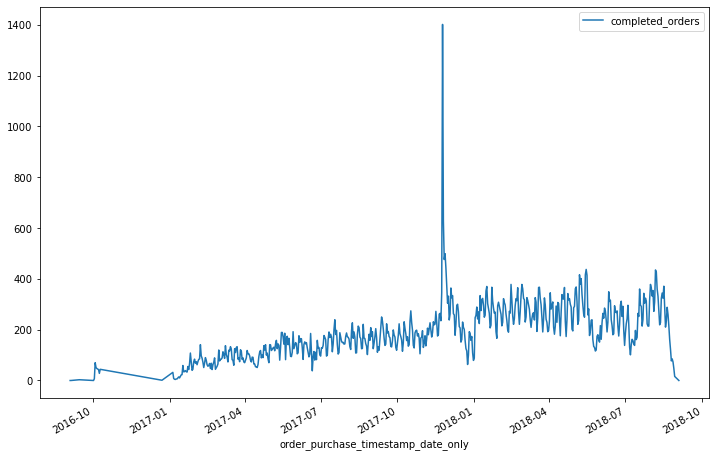

In [55]:
df2.plot(y='completed_orders', figsize=(12,8))

In [56]:
df2['completed_orders'].idxmax()

Timestamp('2017-11-24 00:00:00')

2017-11-24 was the date that had the most orders. Maybe it was because of black friday sales

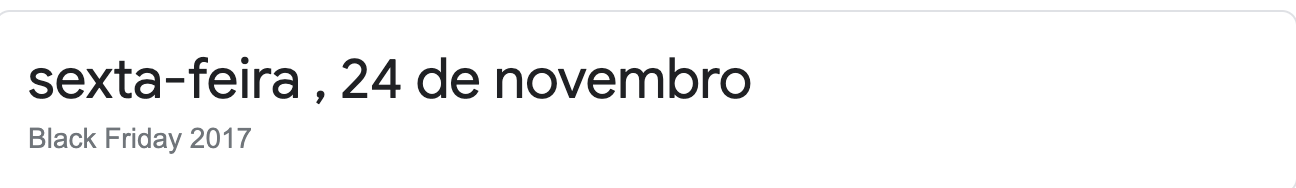
I guess our assumption was right! The date with the most sales was a black friday

In [57]:
df2['completed_orders']

order_purchase_timestamp_date_only
2016-09-04     0
2016-09-05     0
2016-09-15     3
2016-10-02     0
2016-10-03     7
              ..
2018-08-26    85
2018-08-27    73
2018-08-28    47
2018-08-29    16
2018-09-03     0
Name: completed_orders, Length: 616, dtype: int64

In [58]:
df2.index

DatetimeIndex(['2016-09-04', '2016-09-05', '2016-09-15', '2016-10-02',
               '2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-08',
               ...
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-09-03'],
              dtype='datetime64[ns]', name='order_purchase_timestamp_date_only', length=616, freq=None)

In [59]:
idx= pd.date_range('2016-09-04', '2018-08-29')

In [60]:
df2= df2['completed_orders'].reindex(idx, fill_value=0)

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [62]:
result= seasonal_decompose(df2,model='aditive')

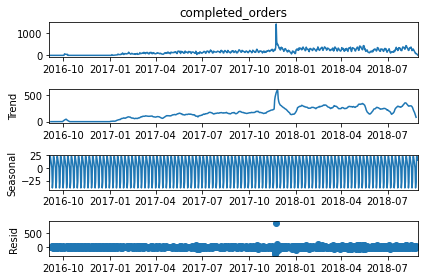

In [63]:
result.plot();

In [64]:
from pmdarima import auto_arima

In [65]:
len(df2)

725

In [66]:
train= df2.iloc[:511]
test= df2.iloc[511:]

In [67]:
auto_arima(df2, seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  725
Model:             SARIMAX(2, 1, 3)x(1, 0, [1, 2], 7)   Log Likelihood               -3906.561
Date:                                Tue, 15 Jun 2021   AIC                           7831.123
Time:                                        21:06:33   BIC                           7872.386
Sample:                                             0   HQIC                          7847.048
                                                - 725                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6519      0.557      1.171      0.242      -0.439       1.743
ar.L2          0.1687      0.442      0.382      0.703      -0.698       1.036
ma.L1         -1.1043      0.557     -1.982      0.048      -2.197      -0.012
ma.L2         -0.0509      0.697     -0.073      0.942      -1.417       1.315
ma.L3          0.1632      0.156      1.043      0.297      -0.143       0.470
ar.S.L7        0.9875      0.013     73.782      0.000       0.961       1.014
ma.S.L7       -0.8667      0.031    -27.717      0.000      -0.928      -0.805
ma.S.L14      -0.0520      0.031     -1.700      0.089      -0.112       0.008
sigma2      2773.1120     17.184    161.378      0.000    2739.432    2806.792
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           2295688.14
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               7.72   Skew:                            12.96
Prob(H) (two-sided):                  0.00   Kurtosis:                       277.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [69]:
model= SARIMAX(df2, order=(2, 1, 3), seasonal_order=(1, 0, [1, 2], 7), enforce_invertibility=False)

In [70]:
results= model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [71]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                       completed_orders   No. Observations:                  725
Model:             SARIMAX(2, 1, 3)x(1, 0, [1, 2], 7)   Log Likelihood               -3912.109
Date:                                Tue, 15 Jun 2021   AIC                           7842.219
Time:                                        21:06:38   BIC                           7883.482
Sample:                                    09-04-2016   HQIC                          7858.144
                                         - 08-29-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9273      1.201      0.772      0.440      -1.427       3.281
ar.L2         -0.0643      0.982     -0.066      0.948      -1.988       1.859
ma.L1         -1.3797      1.202     -1.148      0.251      -3.736       0.976
ma.L2          0.3243      1.540      0.211      0.833      -2.695       3.343
ma.L3          0.0613      0.354      0.173      0.862      -0.632       0.755
ar.S.L7        0.9847      0.018     54.478      0.000       0.949       1.020
ma.S.L7       -0.8467      0.038    -22.162      0.000      -0.922      -0.772
ma.S.L14      -0.0671      0.038     -1.759      0.079      -0.142       0.008
sigma2      3375.4202     28.798    117.209      0.000    3318.977    3431.864
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           2284838.12
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               7.66   Skew:                            12.93
Prob(H) (two-sided):                  0.00   Kurtosis:                       276.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
start= len(train)
end= len(train)+ len(test)-1

In [73]:
predictions= results.predict(start, end).rename('Prediction')

<AxesSubplot:>

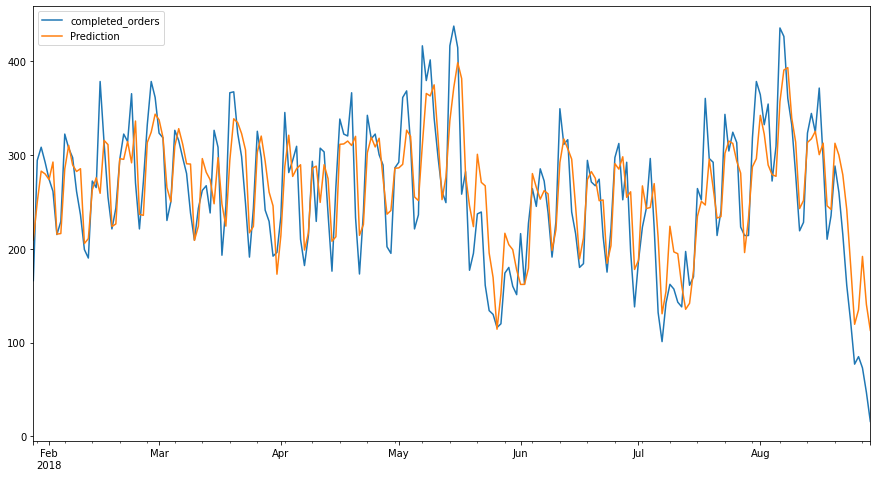

In [74]:
ax= test.plot(legend=True, figsize=(15,8))
predictions.plot(legend=True)

In [75]:
fcast= results.predict(len(df2), len(df2)+30, typ='levels').rename('SARIMA FORECAST')

<AxesSubplot:>

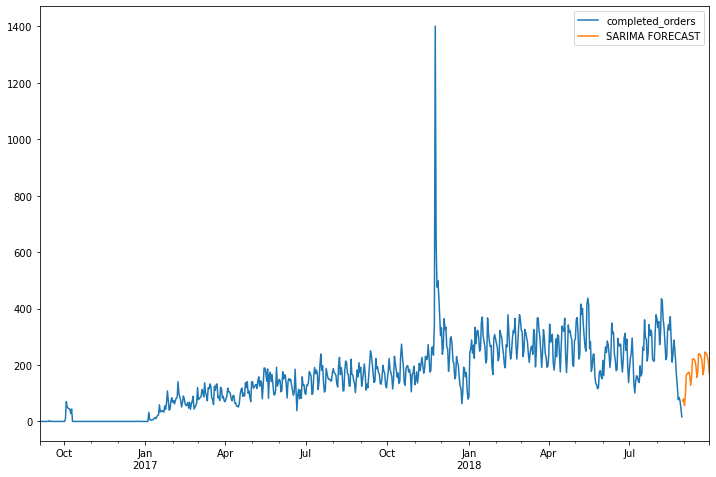

In [76]:
df2.plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)

In [77]:
fcast

2018-08-30     71.923471
2018-08-31     80.035055
2018-09-01     56.795171
2018-09-02     91.668556
2018-09-03    162.406321
2018-09-04    168.798941
2018-09-05    171.723143
2018-09-06    174.811121
2018-09-07    162.016475
2018-09-08    127.579486
2018-09-09    153.590789
2018-09-10    220.786311
2018-09-11    221.886887
2018-09-12    220.736757
2018-09-13    213.923694
2018-09-14    194.941777
2018-09-15    156.145550
2018-09-16    177.639473
2018-09-17    240.301951
2018-09-18    238.400051
2018-09-19    234.724574
2018-09-20    225.849801
2018-09-21    205.313371
2018-09-22    165.539098
2018-09-23    185.366176
2018-09-24    245.930815
2018-09-25    243.087198
2018-09-26    238.641067
2018-09-27    229.197733
2018-09-28    208.375458
2018-09-29    168.698406
Freq: D, Name: SARIMA FORECAST, dtype: float64

Ok, so this is our forecast for the next month.

### Products/reviews overview
Now let's observe which category of products are the most popular and their reviews. In the review section, we'll take a look if the reviews are mostly positive or negative. Also, let's check out which product category has the highest and lowest ratings.

In [78]:
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

<AxesSubplot:xlabel='count', ylabel='product_category_name'>

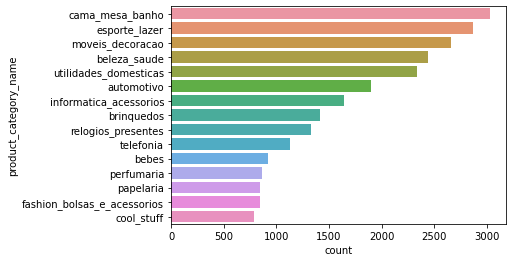

In [79]:
sns.countplot(data=products, y='product_category_name',order=products['product_category_name'].value_counts().iloc[:15].index)

In [80]:
df3=products.merge(itens, how='left', on='product_id')

In [81]:
df3=df3.merge(orders, how='left', on='order_id')

In [82]:
df3=df3.merge(review, how='left', on='order_id')

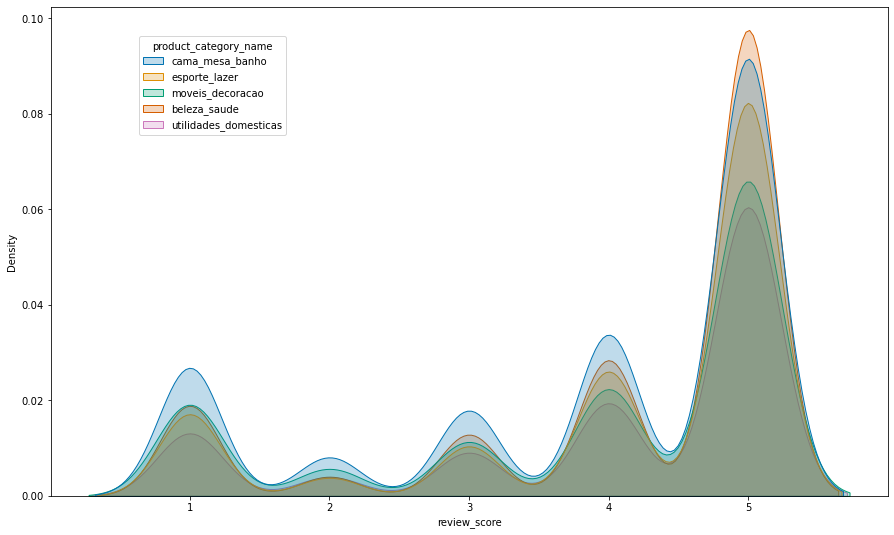

In [83]:
fig=plt.figure(figsize=(15,9))
ax=sns.kdeplot(data=df3, x='review_score',fill=True,hue='product_category_name',hue_order=products['product_category_name'].value_counts().iloc[:5].index, clip=[0,6], palette="colorblind")
ax.legend_.set_bbox_to_anchor((0.1, 0.95))
ax.legend_._set_loc(2)

In [84]:
df3.groupby('product_category_name').mean()['review_score'].sort_values(ascending=True).iloc[:5]

product_category_name
seguros_e_servicos                               2.500000
fraldas_higiene                                  3.256410
portateis_cozinha_e_preparadores_de_alimentos    3.266667
pc_gamer                                         3.333333
casa_conforto_2                                  3.366667
Name: review_score, dtype: float64

In [85]:
df3.groupby('product_category_name').mean()['review_score'].sort_values(ascending=False).iloc[:5]

product_category_name
cds_dvds_musicais                     4.642857
fashion_roupa_infanto_juvenil         4.500000
livros_interesse_geral                4.439421
livros_importados                     4.400000
construcao_ferramentas_ferramentas    4.359223
Name: review_score, dtype: float64

In [86]:
reviews=df['review_comment_message'].dropna()

In [87]:
text = " ".join(review for review in reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3687292 words in the combination of all review.


In [88]:
reviews

0            Perfeito, produto entregue antes do combinado.
2         Chegou antes do prazo previsto e o produto sur...
4                   Gostei pois veio no prazo determinado .
8         Na descrição do produto quando fui efetuar a c...
10        A caixa do produto veio com uma pequena avaria...
                                ...                        
118288                  Adorei o produto ótimo e recomendo.
118302                                              Tudo ok
118303                                              Tudo ok
118306    A compra foi feita Há mais de um mes e ainda n...
118316      Recebi o produto antes do prazo e corretamente.
Name: review_comment_message, Length: 50668, dtype: object

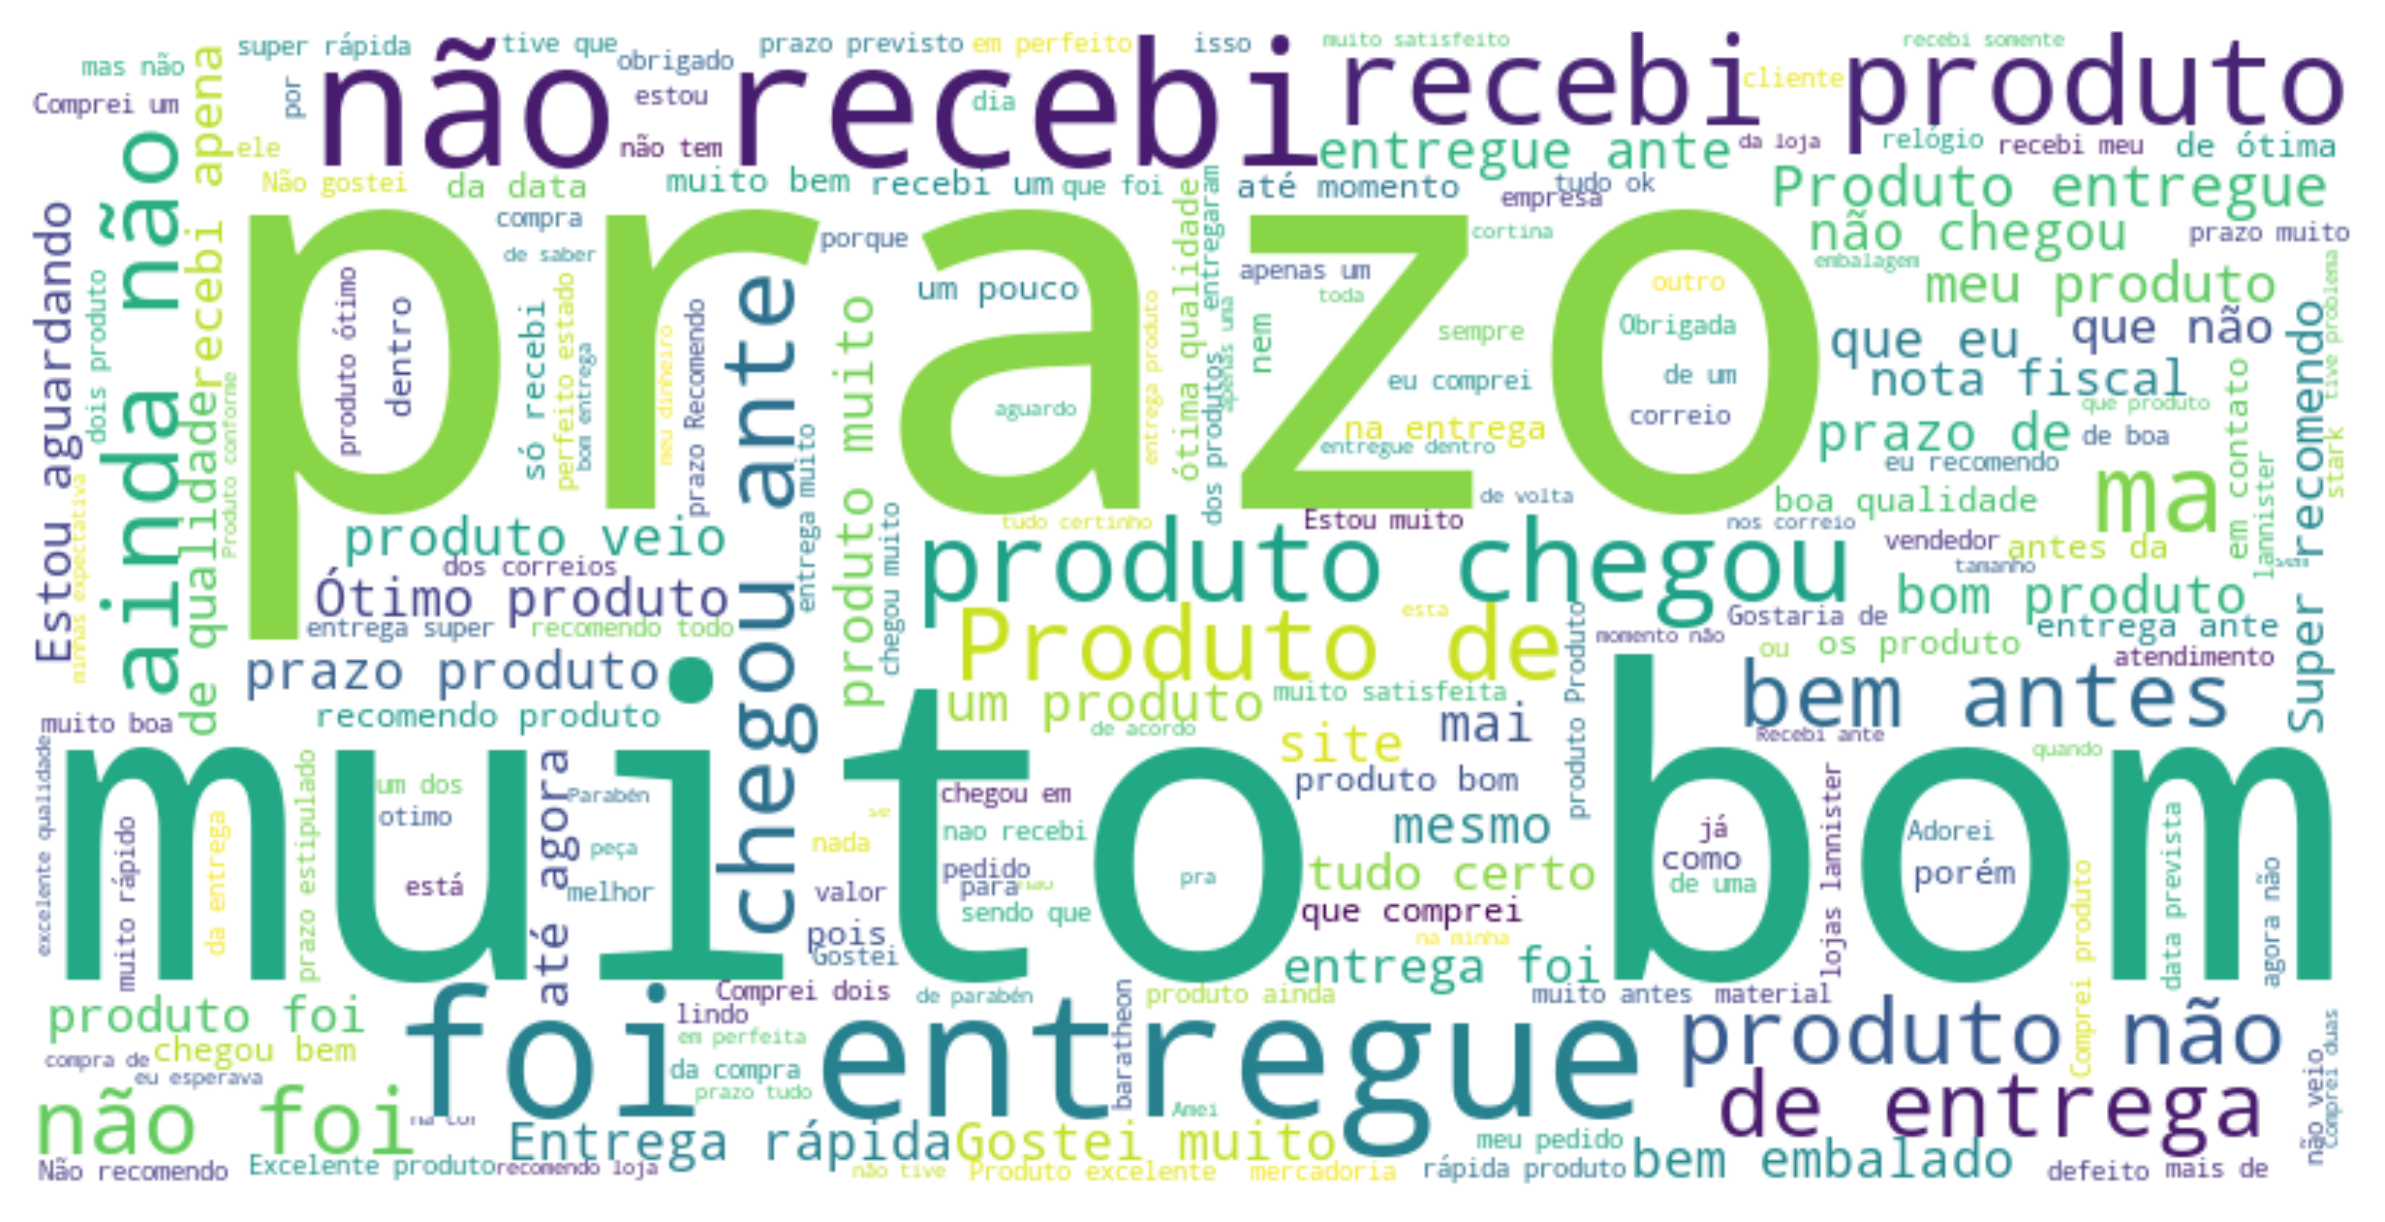

In [89]:
stopwords = set(STOPWORDS)


wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=800, height=400).generate(text)

plt.figure(figsize=(10,7), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [90]:
from googletrans import Translator
from google_trans_new import google_translator 

In [91]:
translator = Translator()

In [92]:
translator = google_translator()  
translate_text = translator.translate('oi', lang_src='pt', lang_tgt='en')  
print(translate_text)

Hey 


Testing out this google translator library. Looks like it works. But the reason I am translating the reviews is because TextBlob, which is the NLP tool I am going to use,does not support Portuguese as a language.

In [93]:
reviews=pd.DataFrame(data=reviews)

In [94]:
reviews

review_comment_message
0          Perfeito, produto entregue antes do combinado.
2       Chegou antes do prazo previsto e o produto sur...
4                 Gostei pois veio no prazo determinado .
8       Na descrição do produto quando fui efetuar a c...
10      A caixa do produto veio com uma pequena avaria...
...                                                   ...
118288                Adorei o produto ótimo e recomendo.
118302                                            Tudo ok
118303                                            Tudo ok
118306  A compra foi feita Há mais de um mes e ainda n...
118316    Recebi o produto antes do prazo e corretamente.

[50668 rows x 1 columns]

In [95]:
#reviews['English'] = reviews['review_comment_message'].apply(translator.translate, lang_src='pt',  lang_tgt='en')

In [96]:
en_review=translator.translate(reviews,lang_src='pt', lang_tgt='en')

In [97]:
en_review

'Review_comment_message  0 Perfect, product delivered before the agreed.  2 has arrived before the expected deadline and the sur ...  4 I liked it because it came within a given period.  8 In the description of the product when I went to c ...  10 The product box came with a small fault ...  ... ... ...  118288 I loved the product great and recommending.  118302 everything ok  118303 everything ok  118306 The purchase has been made for more than a month and still n ...  118316 I received the product before time and correctly.  [50668 Rows x 1 Columns] '

In [98]:
from textblob import TextBlob

In [99]:
result = ''.join([i for i in en_review if not i.isdigit()])
result

'Review_comment_message   Perfect, product delivered before the agreed.   has arrived before the expected deadline and the sur ...   I liked it because it came within a given period.   In the description of the product when I went to c ...   The product box came with a small fault ...  ... ... ...   I loved the product great and recommending.   everything ok   everything ok   The purchase has been made for more than a month and still n ...   I received the product before time and correctly.  [ Rows x  Columns] '

In [100]:
result

'Review_comment_message   Perfect, product delivered before the agreed.   has arrived before the expected deadline and the sur ...   I liked it because it came within a given period.   In the description of the product when I went to c ...   The product box came with a small fault ...  ... ... ...   I loved the product great and recommending.   everything ok   everything ok   The purchase has been made for more than a month and still n ...   I received the product before time and correctly.  [ Rows x  Columns] '

In [101]:
pol=TextBlob(result).sentiment.polarity

In [102]:
sub=TextBlob(result).sentiment.subjectivity

In [103]:
print('Polarity is:\n',round(pol,2))
print('Subjectivity is:\n',round(sub,2))

Polarity is:
 0.47
Subjectivity is:
 0.63


It looks like the polarity is mostly positive and since the subjectivity is around 0.6, it means that it is an opiion rather than facts